<a href="https://colab.research.google.com/github/convin305/sum-tudy/blob/master/Time_Series_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[순환 신경망](https://excelsior-cjh.tistory.com/184)



시계열 데이터 만들기

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

In [ ]:
t_min, t_max = 0, 30
resolution = 0.1

In [ ]:
def time_series(t):
  return t * np.sin(t) / 3 + 2* np.sin(t*5)

<function matplotlib.pyplot.show>

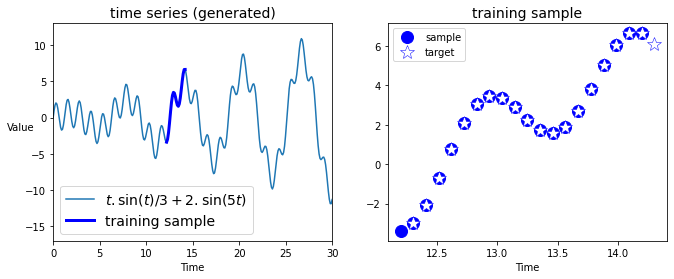

In [ ]:
#mini batch function
def next_batch(batch_size, n_steps):
  t0 = np.random.rand(batch_size,1) * (t_max - t_min - n_steps * resolution)
  Ts = t0 + np.arange(0., n_steps+1) * resolution
  ys = time_series(Ts)
  return ys[:,:-1].reshape(-1, n_steps, 1), ys[:,1:].reshape(-1,n_steps,1)

#t_min과 t_max사이를 세번째 인수 개수의 구간만큼 나눠라.
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps+1), n_steps + 1)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.title('time series (generated)',fontsize=14)
plt.plot(t, time_series(t), label = r"$t. \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]),"b-",linewidth=3, label="training sample")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0,30,-17,13]) #축설정
plt.xlabel("Time")
plt.ylabel("Value", rotation=0)

plt.subplot(122)
plt.title("training sample",fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]),
         "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show


RNN모델링  
* 순환뉴런 개수 :  100개   
* 타임스텝(n_steps) : 20개 ( 입력 시퀀스의 길이, 출력 시퀀스의 길이가 20)

In [ ]:
#layer params
n_steps = 20 
n_neurons = 100 
n_inputs = 1 
n_outputs = 1

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#placeholder : x,y는 tf.float32형이고, [?,n_steps,n_input/outputs]의 값을 가질 수 있다. 
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# RNN model
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)

#하나의 출력을 위한 작업
stacked_rnn_outputs = tf.reshape(tensor=rnn_outputs, shape=[-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
predictions = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:421: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/p

In [ ]:
#train_params
learning_rate = 0.001
n_iterations = 600
batch_size = 50

#loss
mse = tf.losses.mean_squared_error(labels=y, predictions=predictions)
#optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mse)

#Train
with tf.Session() as sess : 
  tf.global_variables_initializer().run()
  for iteration in range(n_iterations):
    batch_x, batch_y = next_batch(batch_size, n_steps)
    sess.run(train_op, feed_dict={x : batch_x, y : batch_y})
    if iteration % 100 == 0 :
      loss = mse.eval(feed_dict={x : batch_x, y : batch_y})
      print('step : {:03d}, MSE : {:.4f}'.format(iteration, loss))

step : 000, MSE : 24.1725
step : 100, MSE : 0.6071
step : 200, MSE : 0.1889
step : 300, MSE : 0.0763
step : 400, MSE : 0.0567
step : 500, MSE : 0.0575
